## Import library

In [1]:
import sys
sys.path.insert(
    1,
    '/home/dtd/Documents/interpretable_machine_learning/Source Code/my_work/lib'
)

import data_load
import numpy as np
import pandas as pd
import logging
import incremental_ps_score_estimator as ipse
import math
import timeit
import utils
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import KFold

import dowhy.datasets
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt

from econml.drlearner import ForestDRLearner, LinearDRLearner
from econml.metalearners import SLearner, XLearner, TLearner
from econml.ortho_forest import CausalTree, ContinuousTreatmentOrthoForest, DiscreteTreatmentOrthoForest
from econml.dml import ForestDMLCateEstimator, LinearDMLCateEstimator, SparseLinearDMLCateEstimator
from econml.inference import BootstrapInference
from econml.sklearn_extensions.linear_model import WeightedLasso, WeightedLassoCV

### Import sklearn
from scipy.stats import sem
import scipy.stats as st
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LassoCV, ElasticNetCV
from cforest.forest import CausalForest
import sys
sys.path.insert(
    1,
    '/home/dtd/Documents/interpretable_machine_learning/Source Code/my_work/lib'
)

import data_load
import numpy as np
import pandas as pd
import logging
import incremental_ps_score_estimator as ipse
import math
import timeit
import utils
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import KFold

import dowhy.datasets
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt

from econml.drlearner import ForestDRLearner, LinearDRLearner
from econml.metalearners import SLearner, XLearner, TLearner
from econml.ortho_forest import CausalTree, ContinuousTreatmentOrthoForest, DiscreteTreatmentOrthoForest
from econml.dml import ForestDMLCateEstimator, LinearDMLCateEstimator, SparseLinearDMLCateEstimator
from econml.inference import BootstrapInference
from econml.sklearn_extensions.linear_model import WeightedLasso, WeightedLassoCV

### Import sklearn
from scipy.stats import sem
import scipy.stats as st
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LassoCV, ElasticNetCV
from cforest.forest import CausalForest
import sys
sys.path.insert(
    1,
    '/home/dtd/Documents/interpretable_machine_learning/Source Code/my_work/lib'
)

import data_load
import numpy as np
import pandas as pd
import logging
import incremental_ps_score_estimator as ipse
import math
import timeit
import utils
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import KFold

import dowhy.datasets
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt

from econml.drlearner import ForestDRLearner, LinearDRLearner
from econml.metalearners import SLearner, XLearner, TLearner
from econml.ortho_forest import CausalTree, ContinuousTreatmentOrthoForest, DiscreteTreatmentOrthoForest
from econml.dml import ForestDMLCateEstimator, LinearDMLCateEstimator, SparseLinearDMLCateEstimator
from econml.inference import BootstrapInference
from econml.sklearn_extensions.linear_model import WeightedLasso, WeightedLassoCV

### Import sklearn
from scipy.stats import sem
import scipy.stats as st
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LassoCV, ElasticNetCV
from cforest.forest import CausalForest


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load data 

In [2]:
# Import the sample AB data
file_url = "https://msalicedatapublic.blob.core.windows.net/datasets/RecommendationAB/ab_sample.csv"   
ab_data = pd.read_csv(file_url)

In [3]:
ab_data.head()

,days_visited_exp_pre,days_visited_free_pre,days_visited_fs_pre,days_visited_hs_pre,days_visited_rs_pre,days_visited_vrs_pre,locale_en_US,revenue_pre,os_type_osx,os_type_windows,easier_signup,became_member,days_visited_post
0,1,9,7,25,6,3,1,0.01,0,1,0,0,1
1,10,25,27,10,27,27,0,2.26,0,0,0,0,15
2,18,14,8,4,5,2,1,0.03,0,1,0,0,17
3,17,0,23,2,3,1,1,418.77,0,1,0,0,6
4,24,9,22,2,3,18,1,1.54,0,0,0,0,12


In [4]:
ab_data.became_member.value_counts()

0    64780
1    35220
Name: became_member, dtype: int64

In [5]:
ab_data.columns

Index(['days_visited_exp_pre', 'days_visited_free_pre', 'days_visited_fs_pre',
       'days_visited_hs_pre', 'days_visited_rs_pre', 'days_visited_vrs_pre',
       'locale_en_US', 'revenue_pre', 'os_type_osx', 'os_type_windows',
       'easier_signup', 'became_member', 'days_visited_post'],
      dtype='object')

In [6]:
# Define estimator inputs
Z = ab_data['easier_signup'] # nudge, or instrument
T = ab_data['became_member'] # intervention, or treatment
Y = ab_data['days_visited_post'] # outcome of interest
X_data = ab_data.drop(columns=['easier_signup', 'became_member', 'days_visited_post']) # features

col = ['days_visited_exp_pre', 'days_visited_free_pre', 'days_visited_fs_pre',
       'days_visited_hs_pre', 'days_visited_rs_pre', 'days_visited_vrs_pre',
       'locale_en_US', 'revenue_pre', 'os_type_osx', 'os_type_windows',
       'easier_signup', 'became_member', 'days_visited_post']

cov = ['days_visited_exp_pre', 'days_visited_free_pre', 'days_visited_fs_pre',
       'days_visited_hs_pre', 'days_visited_rs_pre', 'days_visited_vrs_pre',
       'locale_en_US', 'revenue_pre', 'os_type_osx', 'os_type_windows',
       'easier_signup']

features = ['days_visited_exp_pre', 'days_visited_free_pre', 'days_visited_fs_pre',
       'days_visited_hs_pre', 'days_visited_rs_pre', 'days_visited_vrs_pre',
       'locale_en_US', 'revenue_pre', 'os_type_osx', 'os_type_windows',
            'became_member']

treatment = 'became_member' # intervention, or treatment
outcome = 'days_visited_post' # outcome of interest




In [7]:
# Define underlying treatment effect function 
TE_fn = lambda X: (0.2 + 0.3 * X['days_visited_free_pre'] - 0.2 * X['days_visited_hs_pre'] + X['os_type_osx']).values
true_TE = TE_fn(ab_data[cov])

In [8]:
true_effect = np.mean(true_TE)

In [9]:
ab_data[features]

,days_visited_exp_pre,days_visited_free_pre,days_visited_fs_pre,days_visited_hs_pre,days_visited_rs_pre,days_visited_vrs_pre,locale_en_US,revenue_pre,os_type_osx,os_type_windows,became_member
0,1,9,7,25,6,3,1,0.01,0,1,0
1,10,25,27,10,27,27,0,2.26,0,0,0
2,18,14,8,4,5,2,1,0.03,0,1,0
3,17,0,23,2,3,1,1,418.77,0,1,0
4,24,9,22,2,3,18,1,1.54,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,27,27,8,4,25,20,1,0.02,1,0,1
99996,22,21,15,27,24,18,0,6.98,1,0,1
99997,13,5,5,25,28,24,1,0.01,0,1,0
99998,21,13,5,24,14,2,0,0.07,0,0,1


In [10]:
ab_data.became_member.value_counts()

0    64780
1    35220
Name: became_member, dtype: int64

In [11]:
features

['days_visited_exp_pre',
 'days_visited_free_pre',
 'days_visited_fs_pre',
 'days_visited_hs_pre',
 'days_visited_rs_pre',
 'days_visited_vrs_pre',
 'locale_en_US',
 'revenue_pre',
 'os_type_osx',
 'os_type_windows',
 'became_member']

In [12]:
train, test = train_test_split(ab_data, test_size=0.2, random_state = 1)
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

## Fit treatment
model_t = LogisticRegression()
model_t.fit(train[cov], train[treatment])

train['p1'] = model_t.predict_proba(train[cov])[:,1]
train['p0'] = 1 - train['p1']

train["prediction"] = np.where(train["p1"] >= 0.5, 1, 0)
acc = accuracy_score(train["prediction"], train[treatment])
print("Accuracy score of train data {}".format(acc))

## Fit outcome
model_y = GradientBoostingRegressor(random_state=0, n_estimators = 5000)
model_y.fit(train[features], train[outcome])


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score of train data 0.8377875


GradientBoostingRegressor(n_estimators=5000, random_state=0)

In [13]:
delta = 3
influence_train = ipse.influence_function(train, treatment, cov, outcome, features, delta, model_y, model_t)
influence_test = ipse.influence_function(test, treatment, cov, outcome, features, delta, model_y, model_t)
means_incre_train, stds_incre_train = np.mean(influence_train, axis=0), sem(influence_train, axis=0)
means_incre_test, stds_incre_test = np.mean(influence_test, axis=0), sem(influence_test, axis=0)

true_effect_test = np.mean(TE_fn(test[cov]))
true_effect_train = np.mean(TE_fn(train[cov]))

print("Training")
print("Estimation effect {:.2f}".format(means_incre_train))
print("True effect {:.2f}".format(true_effect_train))

print("Testing")
print("Estimation effect {:.2f}".format(means_incre_test))
print("True effect {:.2f}".format(true_effect_test))

Training
Estimation effect 3.26
True effect 1.94
Testing
Estimation effect 3.69
True effect 1.94


## Optimzation with individual delta and true_effect

In [14]:
def incre_ps(delta, data):
    q1 = (delta * data['p1']) / (delta * data['p1'] + data['p0'])
    q1 = tf.math.abs(q1)
    a0 = (1-q1)*data['w0']*(data['cf0'] - data[outcome])
    a1 = q1*data['w1']*(data['cf1'] - data[outcome])    
    influence = a1 - a0
    return tf.reduce_mean(influence), influence

def optimization(train, test, true_effect):
    threhold = tf.constant([0.005])
    delta = tf.Variable(np.random.randint(low=1, high=100, size=1), 
                        trainable = True, 
                        dtype = tf.float32)
    delta_seq = []
    losses = []
    losses_test = []
    effects_train = []
    effects_test = []
    influences_train = []
    influences_test = []
    for i in tqdm(range(10000)):
        with tf.GradientTape() as tape:
            mu_influence_train, influence_train = incre_ps(delta, train)
            mu_influence_test, influence_test = incre_ps(delta, test)
            loss = tf.math.abs(true_effect - mu_influence_train)
            loss_test = tf.math.abs(true_effect - mu_influence_test)
            d_delta = tape.gradient(loss, delta)
            opt = tf.keras.optimizers.Adam(learning_rate=0.01)
            opt.apply_gradients(zip([d_delta], [delta]))
            ## early stopping 
            if tf.math.less(loss, threhold):
                print("The performance reach MAE: 0.001. Cancelling the training at step {}".format(i))
                break
            delta_seq.append(delta.numpy())
            losses.append(loss.numpy())
            losses_test.append(loss_test.numpy())
            effects_train.append(mu_influence_train.numpy())
            effects_test.append(mu_influence_test.numpy())
            influences_train.append(influence_train.numpy())
            influences_test.append(influence_test.numpy())
        if i % 1000 == 0:
            print("Epoch {}. Loss {:.4f}".format(i, loss))
            print(influence_test.shape)
    print("Loss {:.3f}".format(loss))
    return delta, delta_seq, losses, losses_test, influences_train, influences_test

In [15]:
delta, delta_seq, losses, losses_test, influences_train, influences_test = optimization(train, test, true_effect)

  0%|          | 8/10000 [00:00<02:09, 77.17it/s]

Epoch 0. Loss 2.1914
(20000,)


 10%|█         | 1009/10000 [00:13<02:02, 73.39it/s]

Epoch 1000. Loss 2.1611
(20000,)


 20%|██        | 2014/10000 [00:27<01:48, 73.30it/s]

Epoch 2000. Loss 2.1251
(20000,)


 30%|███       | 3018/10000 [00:39<01:18, 88.57it/s]

Epoch 3000. Loss 2.0816
(20000,)


 40%|████      | 4013/10000 [00:51<01:18, 76.71it/s]

Epoch 4000. Loss 2.0279
(20000,)


 50%|█████     | 5013/10000 [01:04<00:59, 84.05it/s]

Epoch 5000. Loss 1.9593
(20000,)


 60%|██████    | 6015/10000 [01:17<00:49, 80.41it/s]

Epoch 6000. Loss 1.8679
(20000,)


 70%|███████   | 7008/10000 [01:30<00:38, 77.72it/s]

Epoch 7000. Loss 1.7371
(20000,)


 80%|████████  | 8010/10000 [01:43<00:24, 81.48it/s]

Epoch 8000. Loss 1.5223
(20000,)


 90%|█████████ | 9014/10000 [01:56<00:12, 80.45it/s]

Epoch 9000. Loss 0.0347
(20000,)


100%|██████████| 10000/10000 [02:08<00:00, 77.71it/s]

Loss 0.048


In [16]:
delta_seq[-1]

array([0.00477329], dtype=float32)

In [17]:
lowers_train, uppers_train = [], []
lowers_test, uppers_test = [], []
means_train, means_test = [], []

for i in tqdm(range(len(delta_seq))):

    mean_train, mean_test = np.mean(influences_train[i]), np.mean(influences_test[i])
    
    lower_train, upper_train = st.t.interval(0.90, 
                                         len(influences_train[i])-1, 
                                         loc=mean_train, 
                                         scale=stds_incre_train)
    lower_test, upper_test = st.t.interval(0.90, 
                                             len(influences_test[i])-1, 
                                             loc=mean_test, 
                                             scale=stds_incre_test)
    

    lowers_train.append(lower_train)
    uppers_train.append(upper_train)
    lowers_test.append(lower_test)
    uppers_test.append(upper_test)
    means_train.append(mean_train)
    means_test.append(mean_test)

100%|██████████| 10000/10000 [00:06<00:00, 1462.27it/s]


In [18]:
# influence_train = ipse.influence_function(train, treatment, cov, outcome, features, delta_re, model_y, model_t)
# means_incre_train, stds_incre = np.mean(influence_train, axis=0), sem(influence, axis=0)

# influence_test = ipse.influence_function(test, treatment, cov, outcome, features, delta_re, model_y, model_t)
# means_incre_test, stds_incre = np.mean(influence_test, axis=0), sem(influence, axis=0)

optimal_mae_train = utils.abs_ate(true_effect_train, mean_train)
optimal_mae_test = utils.abs_ate(true_effect_test, mean_test)

origin_mae_train = utils.abs_ate(true_effect_train, means_incre_train)
origin_mae_test = utils.abs_ate(true_effect_test, means_incre_test)


## Conclusion

In [19]:
print("Before Optimization")
print("MAE on training {:.3f} and testing {:.3f}".format(origin_mae_train, origin_mae_test))
print("After Optimization")
print("MAE on training {:.3f} and testing {:.3f}".format(optimal_mae_train, optimal_mae_test))


Before Optimization
MAE on training 1.320 and testing 1.751
After Optimization
MAE on training 0.049 and testing 0.336


In [20]:
np.array(delta_seq).reshape(-1)

array([ 8.799001e+01,  8.798003e+01,  8.797004e+01, ...,  4.773288e-03,
       -5.226709e-03,  4.773288e-03], dtype=float32)

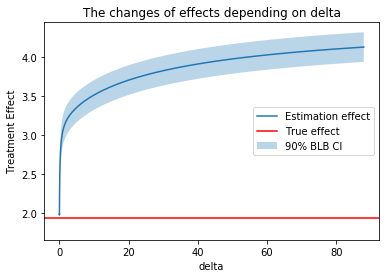

In [21]:
plt.plot(delta_seq, means_train, label='Estimation effect')
plt.axhline(y=true_effect_train, color='r', linestyle='-', label = "True effect")
plt.fill_between(np.array(delta_seq).reshape(-1), lowers_train, uppers_train, label="90% BLB CI", alpha=0.3)
plt.ylabel("Treatment Effect")
plt.xlabel("delta")
plt.title("The changes of effects depending on delta")
plt.legend()
plt.show()

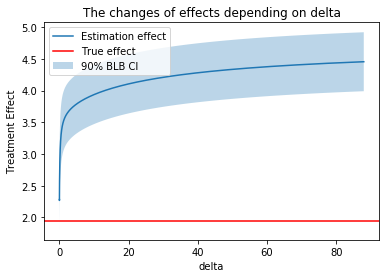

In [22]:
plt.plot(delta_seq, means_test, label='Estimation effect')
plt.axhline(y=true_effect_test, color='r', linestyle='-', label = "True effect")
plt.fill_between(np.array(delta_seq).reshape(-1), lowers_test, uppers_test, label="90% BLB CI", alpha=0.3)
plt.ylabel("Treatment Effect")
plt.xlabel("delta")
plt.title("The changes of effects depending on delta")
plt.legend()
plt.show()

In [23]:
-----

SyntaxError: invalid syntax (<ipython-input-23-0855cc4c4ee0>, line 1)

## Optimization with list of delta

In [ ]:
# def incre_ps(delta, data):
#     q1 = (delta * data['p1']) / (delta * data['p1'] + data['p0'])
#     q1 = tf.math.abs(q1)
#     a0 = (1-q1)*data['w0']*(data['cf0'] - data[outcome])
#     a1 = q1*data['w1']*(data['cf1'] - data[outcome])    
#     influence = a1 - a0
#     return tf.reduce_mean(influence), influence

# def optimization(data, true_effect):
#     threhold = tf.constant([0.05])
#     delta = tf.Variable(np.random.randint(low=1, high=40, size=1), 
#                         trainable = True, 
#                         dtype = tf.float32)
#     delta_seq = []
#     losses = []
#     effects = []
#     influences = []
#     for i in tqdm(range(10000)):
#         with tf.GradientTape() as tape:
#             mu_influence, influence = incre_ps(delta, data)
#             loss = tf.losses.MAE(true_effect, influence)
#             d_delta = tape.gradient(loss, delta)
#             opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#             opt.apply_gradients(zip([d_delta], [delta]))
#             if tf.math.less(loss, threhold):
#                 print("The performance reach MAE: 0.001. Cancelling the training at step {}".format(i))
#                 break
#             delta_seq.append(delta.numpy())
#             losses.append(loss.numpy())
#             effects.append(mu_influence.numpy())
#             influences.append(influence.numpy())
#         if i % 1000 == 0:
#             print("Epoch {}. Loss {:.4f}".format(i, loss))
#     print("Loss {:.3f}".format(loss))
#     print("Effects ", influence)
#     return delta, delta_seq, losses, effects, influences

def incre_ps(delta, data):
    q1 = (delta * data['p1']) / (delta * data['p1'] + data['p0'])
    q1 = tf.math.abs(q1)
    a0 = (1-q1)*data['w0']*(data['cf0'] - data[outcome])
    a1 = q1*data['w1']*(data['cf1'] - data[outcome])    
    influence = a1 - a0
    return tf.reduce_mean(influence), influence

def optimization(train, test, true_effect):
    threhold = tf.constant([0.05])
    delta = tf.Variable(np.random.randint(low=1, high=40, size=1), 
                        trainable = True, 
                        dtype = tf.float32)
    delta_seq = []
    losses = []
    losses_test = []
    effects_train = []
    effects_test = []
    influences_train = []
    influences_test = []
    for i in tqdm(range(10000)):
        with tf.GradientTape() as tape:
            mu_influence_train, influence_train = incre_ps(delta, train)
            mu_influence_test, influence_test = incre_ps(delta, test)
            loss = loss = tf.losses.MAE(true_effect, influence_train)
            loss_test = tf.math.abs(true_effect - mu_influence_test)
            d_delta = tape.gradient(loss, delta)
            opt = tf.keras.optimizers.Adam(learning_rate=0.01)
            opt.apply_gradients(zip([d_delta], [delta]))
            ## early stopping 
            if tf.math.less(loss, threhold):
                print("The performance reach MAE: 0.001. Cancelling the training at step {}".format(i))
                break
            delta_seq.append(delta.numpy())
            losses.append(loss.numpy())
            losses_test.append(loss_test.numpy())
            effects_train.append(mu_influence_train.numpy())
            effects_test.append(mu_influence_test.numpy())
            influences_train.append(influence_train.numpy())
            influences_test.append(influence_test.numpy())
        if i % 1000 == 0:
            print("Epoch {}. Loss {:.4f}".format(i, loss))
            print(influence_test.shape)
    print("Loss {:.3f}".format(loss))
    return delta, delta_seq, losses, losses_test, influences_train, influences_test

In [ ]:
true_effect = TE_fn(train[cov])
delta, delta_seq, losses, losses_test, influences_train, influences_test = optimization(train, test, true_effect)